On this notebook we are going to explore the Iris Data Set.

In the data there is 50 samples from 3 species of this flower, and 4 features. We'll explore the data and build a classifier, to based on the features find which species we are looking at.

Our data has 5 columns:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
col_names = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df = pd.read_csv('iris.data', header=None, names=col_names)

If you want you can upload the data using this command line:

from sklearn.datasets import load_iris

iris = load_iris()

In [4]:
df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.isnull().sum()

sepal_len    0
sepal_wid    0
petal_len    0
petal_wid    0
class        0
dtype: int64

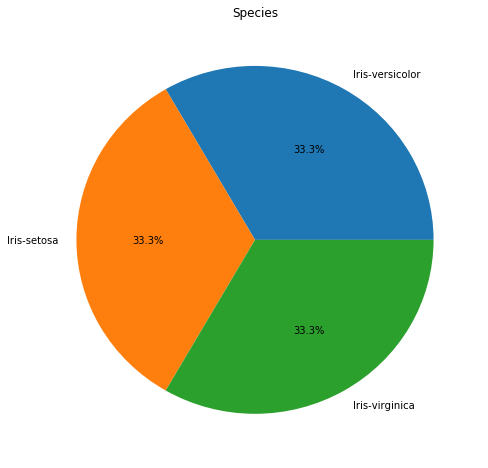

In [6]:
df['class'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8,8), label='')
plt.title('Species')
plt.show()

In [7]:
df.describe()

,sepal_len,sepal_wid,petal_len,petal_wid
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


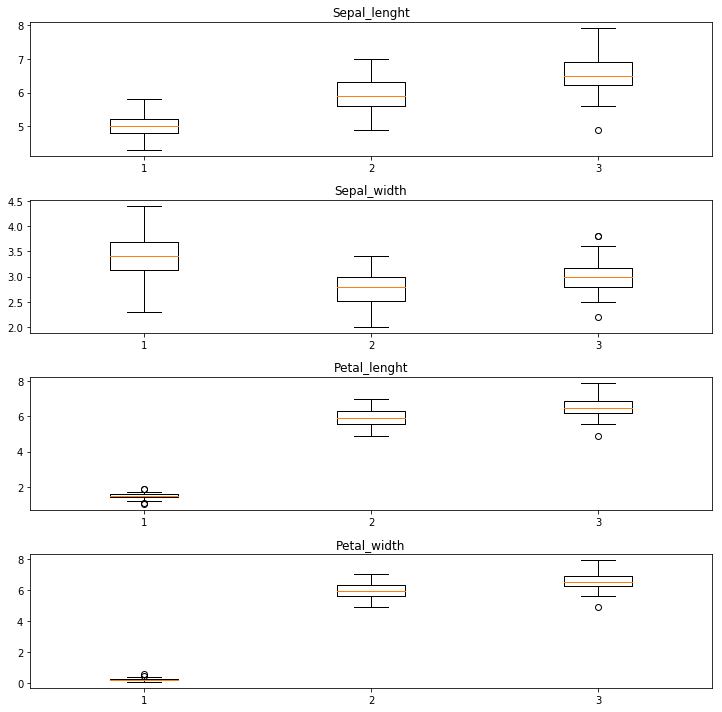

In [34]:
plt.figure(figsize=(10, 10))

plt.subplot(4, 1, 1)
plt.boxplot([df.loc[df['class'] == 'Iris-setosa']['sepal_len'], 
           df.loc[df['class'] == 'Iris-versicolor']['sepal_len'],
          df.loc[df['class'] == 'Iris-virginica']['sepal_len']])
plt.title("Sepal_lenght")

plt.subplot(4, 1, 2)
plt.boxplot([df.loc[df['class'] == 'Iris-setosa']['sepal_wid'], 
           df.loc[df['class'] == 'Iris-versicolor']['sepal_wid'],
          df.loc[df['class'] == 'Iris-virginica']['sepal_wid']])
plt.title("Sepal_width")

plt.subplot(4, 1, 3)
plt.boxplot([df.loc[df['class'] == 'Iris-setosa']['petal_len'], 
           df.loc[df['class'] == 'Iris-versicolor']['sepal_len'],
          df.loc[df['class'] == 'Iris-virginica']['sepal_len']])
plt.title("Petal_lenght")

plt.subplot(4, 1, 4)
plt.boxplot([df.loc[df['class'] == 'Iris-setosa']['petal_wid'], 
           df.loc[df['class'] == 'Iris-versicolor']['sepal_len'],
          df.loc[df['class'] == 'Iris-virginica']['sepal_len']])
plt.title("Petal_width")

plt.tight_layout()
plt.show()

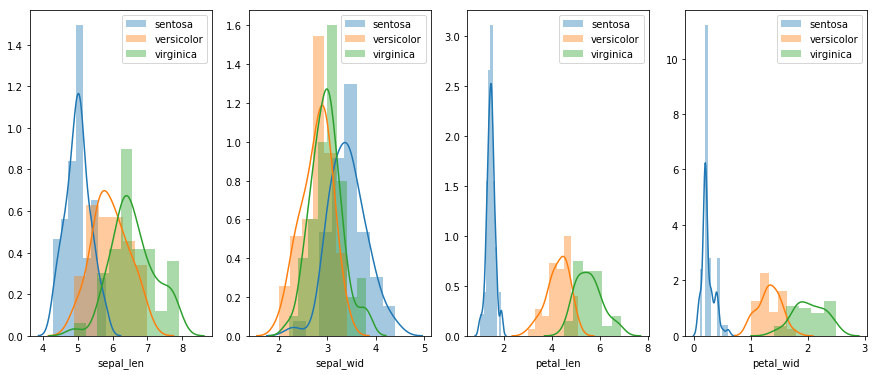

In [63]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 4, 1)
sns.distplot(df.loc[df['class'] == 'Iris-setosa']['sepal_len'], label = 'sentosa')
sns.distplot(df.loc[df['class'] == 'Iris-versicolor']['sepal_len'], label = 'versicolor')
sns.distplot(df.loc[df['class'] == 'Iris-virginica']['sepal_len'], label = 'virginica')
plt.legend()

plt.subplot(1, 4, 2)
sns.distplot(df.loc[df['class'] == 'Iris-setosa']['sepal_wid'], label = 'sentosa')
sns.distplot(df.loc[df['class'] == 'Iris-versicolor']['sepal_wid'], label = 'versicolor')
sns.distplot(df.loc[df['class'] == 'Iris-virginica']['sepal_wid'], label = 'virginica')
plt.legend()

plt.subplot(1, 4, 3)
sns.distplot(df.loc[df['class'] == 'Iris-setosa']['petal_len'], label = 'sentosa')
sns.distplot(df.loc[df['class'] == 'Iris-versicolor']['petal_len'], label = 'versicolor')
sns.distplot(df.loc[df['class'] == 'Iris-virginica']['petal_len'], label = 'virginica')
plt.legend()

plt.subplot(1, 4, 4)
sns.distplot(df.loc[df['class'] == 'Iris-setosa']['petal_wid'], label = 'sentosa')
sns.distplot(df.loc[df['class'] == 'Iris-versicolor']['petal_wid'], label = 'versicolor')
sns.distplot(df.loc[df['class'] == 'Iris-virginica']['petal_wid'], label = 'virginica')
plt.legend()

plt.show()

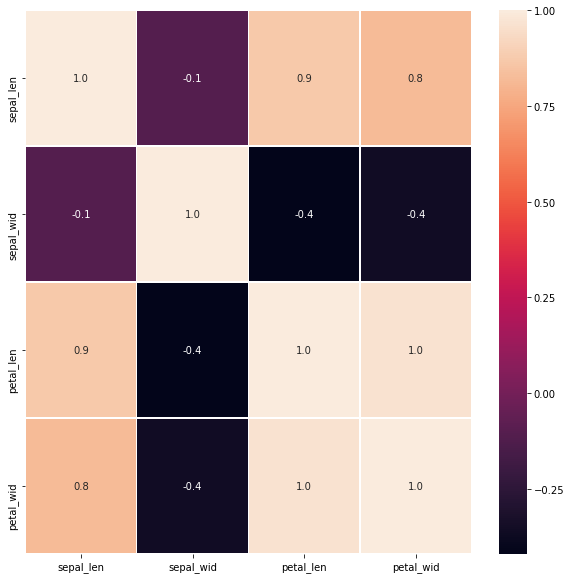

In [41]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

# Model

In [96]:
df.loc[df['class'] == 'Iris-setosa', 'target'] = 0
df.loc[df['class'] == 'Iris-versicolor', 'target'] = 1
df.loc[df['class'] == 'Iris-virginica', 'target'] = 2

classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [72]:
X = df.iloc[:, 0:4].values  
y = df.iloc[:, 5].values  

In [73]:
print(X[0])
print(y[0])

[5.1 3.5 1.4 0.2]
0.0


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score

In [94]:
test_data_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_data_size, random_state=0)  

In [86]:
model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, random_state=42)
model.fit(X_train, y_train)  
y_pred = model.predict(X_test)  

In [87]:
y_pred

array([2., 1., 0., 2., 0., 2., 0., 1., 1., 1., 2., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 2., 1., 0., 0., 2., 0., 0., 1., 1., 0.])

In [88]:
model.predict_proba(X_test)[:5]

array([[0.  , 0.02, 0.98],
       [0.  , 0.95, 0.05],
       [0.99, 0.01, 0.  ],
       [0.  , 0.01, 0.99],
       [1.  , 0.  , 0.  ]])

In [97]:
accur=accuracy_score(y_test,y_pred)
recall=recall_score(y_test, y_pred,average=None)
precision=precision_score(y_test, y_pred,average=None)
print (f'MODEL RESULTS WITH DATASET SPLIT AT {(1-test_data_size)*100:.1f}% TRAINING DATA AND {test_data_size*100:.1f}% TEST DATA\n')
print(f'Model Accuracy:{accur*100:.1f}%\n')



for i,k in enumerate (classes):
    print(f'{k} Recall:{recall[i]*100:.1f}%\n')
    print(f'{k} Precision:{precision[i]*100:.1f}%\n')

MODEL RESULTS WITH DATASET SPLIT AT 80.0% TRAINING DATA AND 20.0% TEST DATA

Model Accuracy:100.0%

Iris-setosa Recall:100.0%

Iris-setosa Precision:100.0%

Iris-versicolor Recall:100.0%

Iris-versicolor Precision:100.0%

Iris-virginica Recall:100.0%

Iris-virginica Precision:100.0%



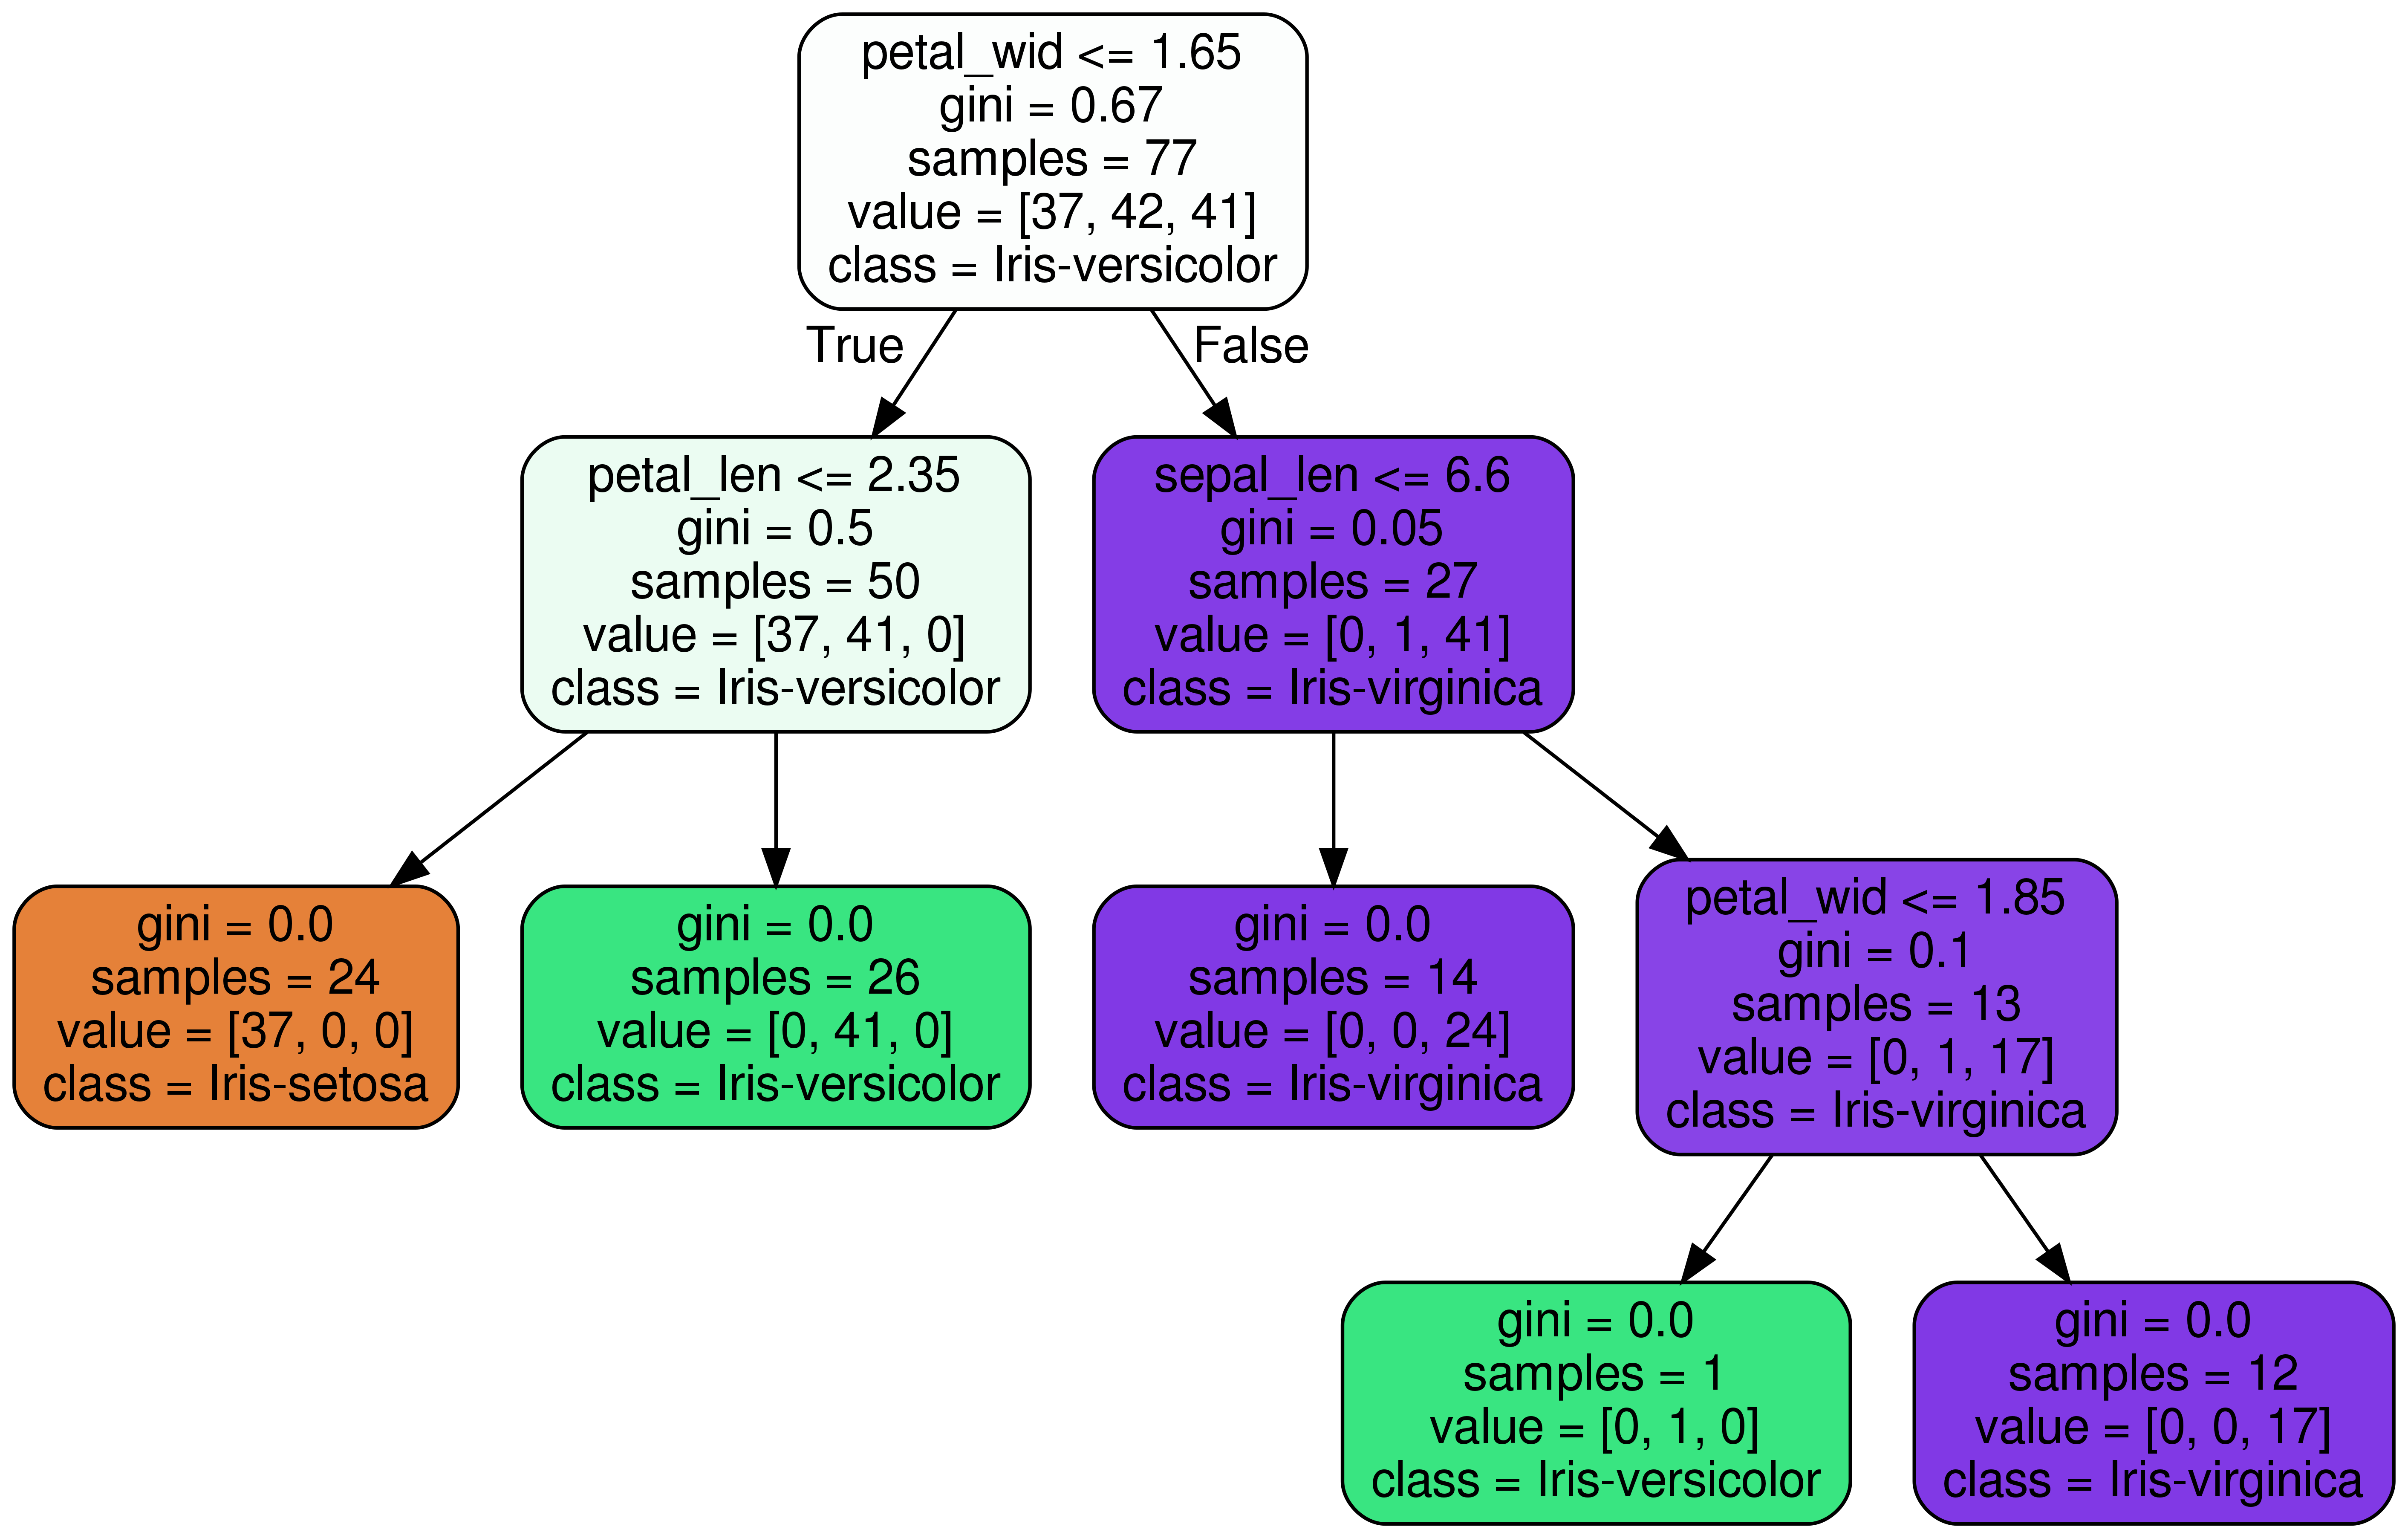

In [115]:
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = col_names[:4],
                class_names = classes,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')